In [ ]:
import os
from typing import Union
from PIL import Image
import torch
import torchvision.transforms as transforms

    # Load the image using PIL
image = Image.open('/content/drive/MyDrive/coding_practise/notebooks/examples/images/causal_language_modeling.png').convert("RGB")
image


input_size=(224,224)
# Define the transformations to be applied to the image
if isinstance(input_size, int):
    # Resize to a square image if input_size is an integer
    transformations = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
else:
    # Resize to the specified height and width if input_size is a tuple
    transformations = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Apply the transformations to the image
    image_tensor = transformations(image)
image_tensor.shape

torch.Size([3, 224, 224])

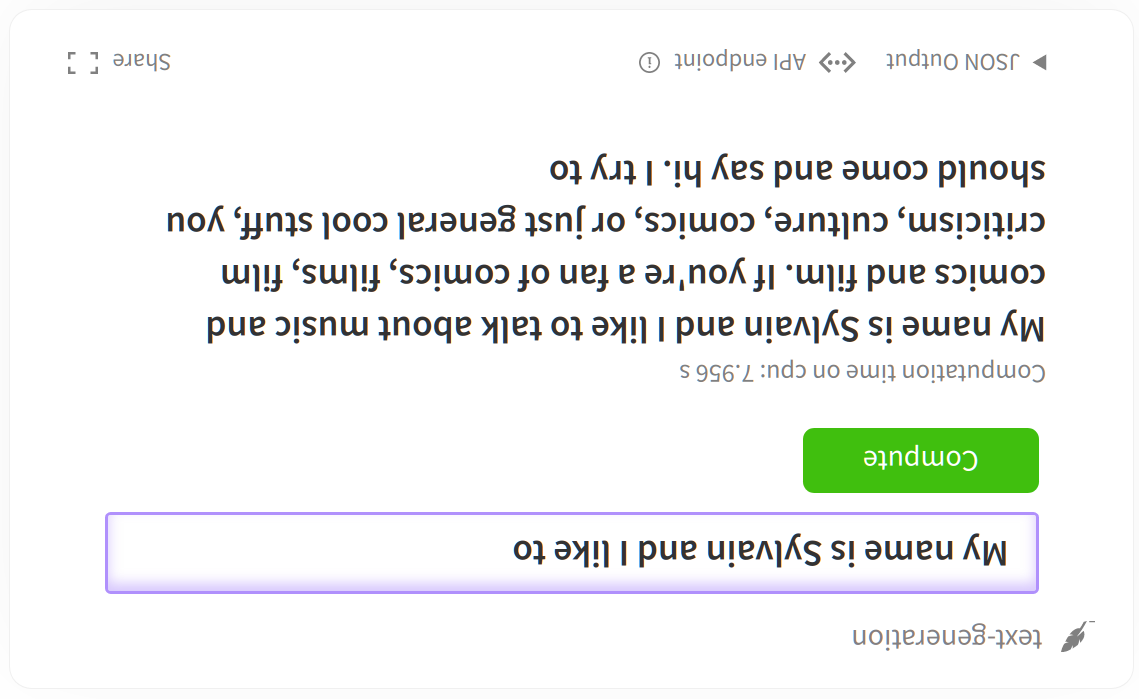

In [ ]:
from PIL import Image

    # Load the image using PIL
image = Image.open('/content/drive/MyDrive/coding_practise/notebooks/examples/images/causal_language_modeling.png').convert("RGB")
image.rotate(angle=180
             )



In [ ]:
import os
from typing import Union
from PIL import Image
import torch
import torchvision.transforms as transforms

def load_and_preprocess_image(image_path: str, input_size: Union[int, tuple]) -> torch.Tensor:
    """
    Load an image from the specified file path, resize it to the desired input size,
    normalize the pixel values, and convert it to a tensor suitable for input to a
    deep learning model.

    Args:
        image_path (str): The file path of the image to be loaded.
        input_size (int or tuple): The desired size of the image after resizing.
            If an integer is provided, the image will be resized to a square with the specified size.
            If a tuple is provided, it should be in the format (height, width).

    Returns:
        torch.Tensor: The preprocessed image tensor ready for input to a deep learning model.

    Example:
        image_tensor = load_and_preprocess_image("path/to/image.jpg", input_size=(224, 224))
    """
    # Check if the image file exists
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # Load the image using PIL
    image = Image.open(image_path).convert("RGB")

    # Define the transformations to be applied to the image
    if isinstance(input_size, int):
        # Resize to a square image if input_size is an integer
        transformations = transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    else:
        # Resize to the specified height and width if input_size is a tuple
        transformations = transforms.Compose([
            transforms.Resize(input_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    # Apply the transformations to the image
    image_tensor = transformations(image)

    return image_tensor

# Example usage
if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/coding_practise/notebooks/examples/images/causal_language_modeling.png'
    input_size = (224, 224)  # Specify the desired input size

    try:
        image_tensor = load_and_preprocess_image(image_path, input_size)
        print("Image preprocessed successfully.")
        print("Image tensor shape:", image_tensor.shape)
    except FileNotFoundError as e:
        print(f"Error: {str(e)}")

Image preprocessed successfully.
Image tensor shape: torch.Size([3, 224, 224])


In [ ]:
import os
from typing import Union, List
from PIL import Image
import torch
import torchvision.transforms as transforms

def load_and_preprocess_image(image_path: str, input_size: Union[int, tuple], transformations: List[str]) -> torch.Tensor:
    """
    Load an image from the specified file path, resize it to the desired input size,
    apply the specified transformations, and convert it to a tensor suitable for input to a
    deep learning model.

    Args:
        image_path (str): The file path of the image to be loaded.
        input_size (int or tuple): The desired size of the image after resizing.
            If an integer is provided, the image will be resized to a square with the specified size.
            If a tuple is provided, it should be in the format (height, width).
        transformations (list): A list of strings specifying the transformations to be applied to the image tensor.
            Supported transformations: "rotate", "flip", "crop", "scale", "translate", "shear",
            "brightness_contrast", "noise", "color", "blur_sharpen".

    Returns:
        torch.Tensor: The preprocessed image tensor with the specified transformations applied.

    Example:
        image_tensor = load_and_preprocess_image("path/to/image.jpg", input_size=(224, 224), transformations=["rotate", "flip"])
    """
    # Check if the image file exists
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # Load the image using PIL
    image = Image.open(image_path).convert("RGB")

    # Define the transformations to be applied to the image
    if isinstance(input_size, int):
        # Resize to a square image if input_size is an integer
        transform_list = [
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
        ]
    else:
        # Resize to the specified height and width if input_size is a tuple
        transform_list = [
            transforms.Resize(input_size),
        ]

    # Add the specified transformations to the transform list
    for transform in transformations:
        if transform == "rotate":
            transform_list.append(transforms.RandomRotation(degrees=10))
        elif transform == "flip":
            transform_list.append(transforms.RandomHorizontalFlip(p=0.5))
        elif transform == "crop":
            transform_list.append(transforms.RandomCrop(size=(200, 200)))
        elif transform == "scale":
            transform_list.append(transforms.RandomResizedCrop(size=input_size, scale=(0.8, 1.0)))
        elif transform == "translate":
            transform_list.append(transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)))
        elif transform == "shear":
            transform_list.append(transforms.RandomAffine(degrees=0, shear=10))
        elif transform == "brightness_contrast":
            transform_list.append(transforms.ColorJitter(brightness=0.2, contrast=0.2))
        elif transform == "noise":
            transform_list.append(transforms.Lambda(lambda x: x + torch.randn_like(x) * 0.1))
        elif transform == "color":
            transform_list.append(transforms.ColorJitter(hue=0.1, saturation=0.1))
        elif transform == "blur_sharpen":
            transform_list.append(transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)))
        else:
            raise ValueError(f"Unsupported transformation: {transform}")

    transform_list.extend([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    transformations = transforms.Compose(transform_list)

    # Apply the transformations to the image
    image_tensor = transformations(image)

    return image_tensor

# User input for image path
image_path = '/content/drive/MyDrive/coding_practise/notebooks/examples/images/causal_language_modeling.png'

# You can set the input size and normalization range as required by your model.
# For example, input_size could be (224, 224) for models like ResNet, and
# normalization_range could be (0.0, 1.0) or (-1.0, 1.0) depending on the model's expected input.
input_size = (224, 224)
selected_transformations=['rotate','flip','crop','scale','translate','shear','brightness_contrast',"blur_sharpen"]
image_tensor = load_and_preprocess_image(image_path, input_size, selected_transformations)
image_tensor.shape

torch.Size([3, 224, 224])

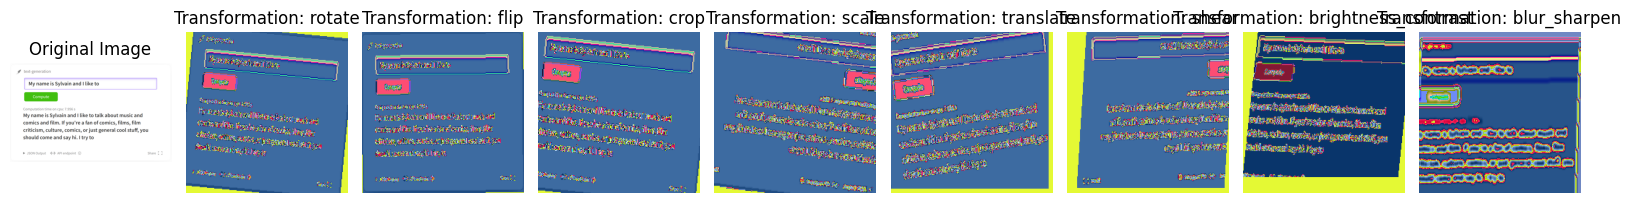

In [ ]:
import os
from typing import Union, List
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



def plot_transformations(image_path, input_size, selected_transformations):
    # Load the original image
    original_image = Image.open(image_path).convert("RGB")

    # Create a figure with subplots
    num_transformations = len(selected_transformations) + 1
    fig, axes = plt.subplots(1, num_transformations, figsize=(16, 16))

    # Plot the original image
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Apply and plot each transformation cumulatively
    cumulative_transforms = []
    for i, transform in enumerate(selected_transformations, start=1):
        cumulative_transforms.append(transform)
        image_tensor = load_and_preprocess_image(image_path, input_size, cumulative_transforms)
        transformed_image = transforms.ToPILImage()(image_tensor)

        axes[i].imshow(transformed_image)
        axes[i].set_title(f"Transformation: {transform}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

# User input for image path
image_path = '/content/drive/MyDrive/coding_practise/notebooks/examples/images/causal_language_modeling.png'

# Set the input size and selected transformations
input_size = (224, 224)
selected_transformations = ['rotate', 'flip', 'crop', 'scale', 'translate', 'shear', 'brightness_contrast', 'blur_sharpen']

# Plot the transformations
plot_transformations(image_path, input_size, selected_transformations)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


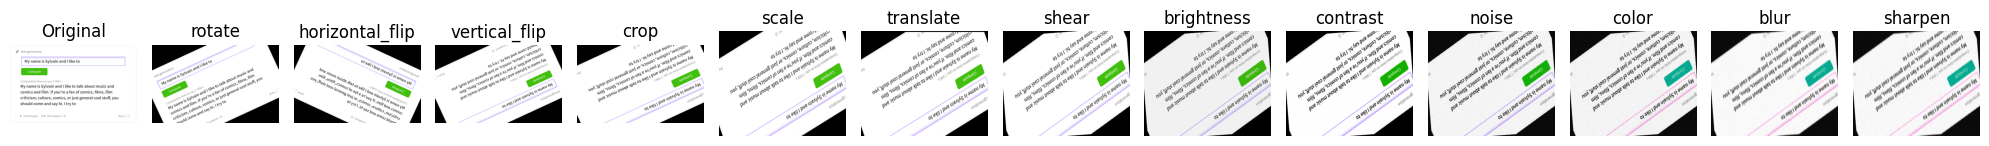

In [ ]:
import torch
import torchvision.transforms.functional as TF
import random
from PIL import Image
import matplotlib.pyplot as plt

# Function to apply transformations
def apply_transformations(tensor_image: torch.Tensor, selected_transformations: list):
    """
    Apply selected transformations to the preprocessed image tensor.

    Parameters:
    - tensor_image (torch.Tensor): The preprocessed image tensor.
    - selected_transformations (list): List of selected transformations to apply.

    Returns:
    - list: List of transformed image tensors.
    """

    transformations = {
        'rotate': lambda image: TF.rotate(image, angle=random.uniform(-180, 180)),
        'horizontal_flip': lambda image: TF.hflip(image),
        'vertical_flip': lambda image: TF.vflip(image),
        'crop': lambda image: TF.center_crop(image, output_size=[int(image.shape[1] * 0.9), int(image.shape[2] * 0.9)]),
        'scale': lambda image: TF.resize(image, size=[int(image.shape[1] * random.uniform(0.5, 1.5)), int(image.shape[2] * random.uniform(0.5, 1.5))]),
        'translate': lambda image: TF.affine(image, angle=0, translate=[int(random.uniform(-10, 10)), int(random.uniform(-10, 10))], scale=1, shear=[0, 0]),
        'shear': lambda image: TF.affine(image, angle=0, translate=[0, 0], scale=1, shear=[random.uniform(-30, 30), random.uniform(-30, 30)]),
        'brightness': lambda image: TF.adjust_brightness(image, brightness_factor=random.uniform(0.5, 1.5)),
        'contrast': lambda image: TF.adjust_contrast(image, contrast_factor=random.uniform(0.5, 1.5)),
        'noise': lambda image: image + torch.randn_like(image) * 0.1,
        'color': lambda image: TF.adjust_hue(image, hue_factor=random.uniform(-0.5, 0.5)),
        'blur': lambda image: TF.gaussian_blur(image, kernel_size=[5, 9], sigma=[0.1, 5]),
        'sharpen': lambda image: TF.adjust_sharpness(image, sharpness_factor=random.uniform(0.5, 2))
    }

    cumulative_images = [tensor_image]  # Initialize with the original image

    # Apply each selected transformation
    for transformation in selected_transformations:
        transformation = transformation.strip()  # Remove leading/trailing whitespace
        if transformation in transformations:
            transformed_image = transformations[transformation](tensor_image)
            cumulative_images.append(transformed_image)  # Append the transformed image
            tensor_image = transformed_image  # Update the tensor_image for cumulative effect
        else:
            print(f"Transformation '{transformation}' is not recognized. Skipping.")

    return cumulative_images

# Load and preprocess the image
# (This part would be the same as the previous example, where the user provides the image path and the preprocessed_image is obtained)
image = Image.open('/content/drive/MyDrive/coding_practise/notebooks/examples/images/causal_language_modeling.png').convert("RGB")
# preprocessed_image = ...  # Preprocess the image as per your requirements
preprocessed_image=TF.to_tensor(image)
# Ask the user which transformations to apply
selected_transformations = ['rotate', 'horizontal_flip', 'vertical_flip', 'crop', 'scale', 'translate', 'shear', 'brightness', 'contrast', 'noise', 'color', 'blur', 'sharpen']

# Apply user-selected transformations
cumulative_images = apply_transformations(preprocessed_image, selected_transformations)

# Display the images one by one
fig, axes = plt.subplots(1, len(cumulative_images), figsize=(20, 5))
for i, transformed_image in enumerate(cumulative_images):
    if transformed_image.dim() == 3:
        axes[i].imshow(transformed_image.permute(1, 2, 0).numpy())  # Convert from CxHxW to HxWxC
    else:
        axes[i].imshow(transformed_image.numpy(), cmap='gray')  # Display grayscale image
    axes[i].axis('off')
    if i == 0:
        axes[i].set_title("Original")
    else:
        axes[i].set_title(f"{selected_transformations[i-1]}")

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
from typing import List, Tuple
import os

def split_image_into_chunks(image_path: str, chunk_size: Tuple[int, int] = (16, 16)) -> List[Image.Image]:
    """
    Splits an image into smaller chunks of a specified size.

    :param image_path: The file path to the image to be split.
    :param chunk_size: The size of each chunk (width, height).
    :return: A list of Image objects, each representing a chunk of the original image.
    """
    try:
        # Load the image from the specified path
        image = Image.open(image_path)
    except IOError:
        print(f"Error: Cannot open the image from the path {image_path}. Please check the file path.")
        return []

    # Calculate the number of chunks in each dimension
    img_width, img_height = image.size
    chunks_x = img_width // chunk_size[0]
    chunks_y = img_height // chunk_size[1]

    # Split the image into chunks
    chunks = []
    for y in range(0, chunks_y * chunk_size[1], chunk_size[1]):
        for x in range(0, chunks_x * chunk_size[0], chunk_size[0]):
            box = (x, y, x + chunk_size[0], y + chunk_size[1])
            chunk = image.crop(box)
            chunks.append(chunk)

    return chunks

def save_chunks(chunks: List[Image.Image], output_dir: str) -> None:
    """
    Saves each image chunk to a specified directory.

    :param chunks: A list of Image objects to be saved.
    :param output_dir: The directory where the image chunks will be saved.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, chunk in enumerate(chunks):
        output_path = os.path.join(output_dir, f"chunk_{i:03d}.png")
        chunk.save(output_path)
        print(f"Saved {output_path}")

# Example usage
if __name__ == "__main__":
    image_path_input = '/content/drive/MyDrive/coding_practise/notebooks/examples/images/causal_language_modeling.png'
    chunks = split_image_into_chunks(image_path_input,chunk_size=(200,200))

    if chunks:
        output_directory = "image_chunks1"
        save_chunks(chunks, output_directory)
        print(f"All chunks have been successfully saved to {output_directory}.")

7797 chunks were created.
(10, 10) chunk_size


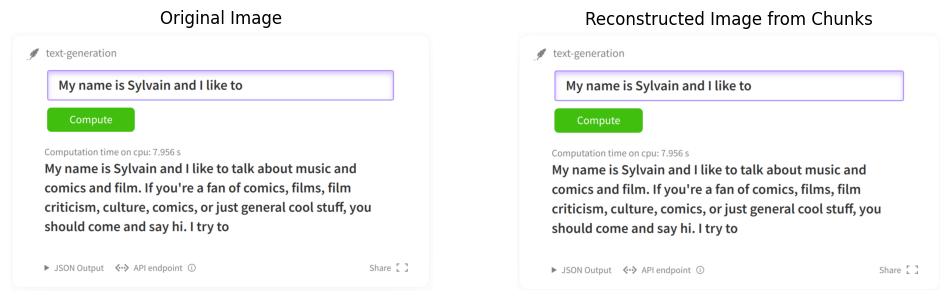

In [ ]:
from typing import List, Tuple
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def split_image_into_chunks(image_path: str, chunk_size: Tuple[int, int] = (16, 16)) -> List[Image.Image]:
    """
    Splits an image into smaller chunks of a specified size.

    :param image_path: The file path to the image to be split.
    :param chunk_size: The size of each chunk (width, height).
    :return: A list of Image objects, each representing a chunk of the original image.
    """
    try:
        # Load the image from the specified path
        image = Image.open(image_path)
    except IOError:
        print(f"Error: Cannot open the image from the path {image_path}. Please check the file path.")
        return []

    # Calculate the number of chunks in each dimension
    img_width, img_height = image.size
    chunks_x = img_width // chunk_size[0]
    chunks_y = img_height // chunk_size[1]

    # Split the image into chunks
    chunks = []
    for y in range(0, chunks_y * chunk_size[1], chunk_size[1]):
        for x in range(0, chunks_x * chunk_size[0], chunk_size[0]):
            box = (x, y, x + chunk_size[0], y + chunk_size[1])
            chunk = image.crop(box)
            chunks.append(chunk)

    return chunks

def plot_image_chunks(chunks: List[Image.Image], chunk_size: Tuple[int, int], original_image: Image.Image):
    """
    Plots all the chunks to form an image plot and compares it with the original image.

    :param chunks: A list of Image objects representing the chunks of the original image.
    :param chunk_size: The size of each chunk (width, height).
    :param original_image: The original Image object.
    """
    # Calculate number of chunks in each dimension
    chunks_x = original_image.size[0] // chunk_size[0]
    chunks_y = original_image.size[1] // chunk_size[1]

    # Create a new image to place the chunks
    new_image = Image.new('RGB', (chunks_x * chunk_size[0], chunks_y * chunk_size[1]))

    # Place each chunk into the new image
    for i, chunk in enumerate(chunks):
        x = (i % chunks_x) * chunk_size[0]
        y = (i // chunks_x) * chunk_size[1]
        new_image.paste(chunk, (x, y))

    # Plot the original and the reconstructed image side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Reconstructed Image from Chunks')
    plt.imshow(new_image)
    plt.axis('off')

    plt.show()

# Example usage
if __name__ == "__main__":
    # Define the image path and the chunk size
    image_path = '/content/drive/MyDrive/coding_practise/notebooks/examples/images/causal_language_modeling.png'
    chunk_size = (10, 10)

    # Split the image into chunks
    chunks = split_image_into_chunks(image_path, chunk_size)
    print(len(chunks), 'chunks were created.')
    print(chunks[0].size,'chunk_size')
    # Load the original image
    original_image = Image.open(image_path)

    # Plot the image chunks and compare with the original
    plot_image_chunks(chunks, chunk_size, original_image)



In [ ]:
from PIL import Image

functionality =dir(Image.Image)
func=[ f for f in functionality if not f.startswith('_')]
func

['alpha_composite',
 'apply_transparency',
 'close',
 'convert',
 'copy',
 'crop',
 'draft',
 'effect_spread',
 'entropy',
 'filter',
 'format',
 'format_description',
 'frombytes',
 'get_child_images',
 'getbands',
 'getbbox',
 'getchannel',
 'getcolors',
 'getdata',
 'getexif',
 'getextrema',
 'getim',
 'getpalette',
 'getpixel',
 'getprojection',
 'height',
 'histogram',
 'load',
 'paste',
 'point',
 'putalpha',
 'putdata',
 'putpalette',
 'putpixel',
 'quantize',
 'reduce',
 'remap_palette',
 'resize',
 'rotate',
 'save',
 'seek',
 'show',
 'size',
 'split',
 'tell',
 'thumbnail',
 'tobitmap',
 'tobytes',
 'toqimage',
 'toqpixmap',
 'transform',
 'transpose',
 'verify',
 'width']

 will provide example snippets for each of the methods

1. `alpha_composite`:

```python
from PIL import Image

# Assuming we have two images with the same size and mode 'RGBA'
image1 = Image.open("image1_with_alpha.png")
image2 = Image.open("image2_with_alpha.png")

# Alpha composite image2 over image1
composite = Image.alpha_composite(image1, image2)
composite.show()
```

2. `close`:

```python
from PIL import Image

# Open an image
image = Image.open("image.png")

# Do some operations with the image
image.rotate(45).show()

# Close the image
image.close()
```

3. `convert`:

```python
from PIL import Image

# Open an image
image = Image.open("color_image.jpg")

# Convert the image to grayscale
gray_image = image.convert("L")
gray_image.show()
```

4. `copy`:

```python
from PIL import Image

# Open an image
image = Image.open("image.png")

# Make a copy of the image
copy_image = image.copy()
copy_image.show()
```

5. `crop`:

```python
from PIL import Image

# Open an image
image = Image.open("image.png")

# Define the box to crop (left, upper, right, lower)
box = (100, 100, 300, 300)

# Crop the image
cropped_image = image.crop(box)
cropped_image.show()
```

6. `draft`:

```python
from PIL import Image

# Open an image file
image = Image.open("large_image.jpg")

# Set draft mode to reduce memory usage
image.draft("RGB", (100, 100))

# Load the image at the drafted size
image.load()
image.show()
```

7. `effect_spread`:

```python
from PIL import Image, ImageFilter

# Open an image
image = Image.open("image.png")

# Apply spread effect
spread_image = image.effect_spread(5)
spread_image.show()
```

8. `entropy`:

```python
from PIL import Image

# Open an image
image = Image.open("image.png")

# Calculate the entropy of the image
image_entropy = image.entropy()
print(f"Entropy: {image_entropy}")
```

9. `filter`:

```python
from PIL import Image, ImageFilter

# Open an image
image = Image.open("image.png")

# Apply a built-in filter, e.g., BLUR
blurred_image = image.filter(ImageFilter.BLUR)
blurred_image.show()
```

10. `format`:

```python
from PIL import Image

# Open an image
image = Image.open("image.png")

# Print the format of the image
print(f"Image format: {image.format}")
```





11. `format_description`:

```python
from PIL import Image

# Open an image
image = Image.open("image.png")

# Print a brief description of the format
print(f"Image format description: {image.format_description}")
```

12. `frombytes`:

```python
from PIL import Image

# Assuming we have raw image data in the correct mode and size
raw_data = b'\xff' * (100 * 100)  # Example for a 100x100 white image in "L" mode

# Create an image from bytes
image = Image.frombytes('L', (100, 100), raw_data)
image.show()
```

13. `getbands`:

```python
from PIL import Image

# Open an image
image = Image.open("color_image.jpg")

# Get the bands of the image
bands = image.getbands()
print(f"Image bands: {bands}")
```

14. `getbbox`:

```python
from PIL import Image

# Open an image
image = Image.open("image_with_transparency.png")

# Get the bounding box of non-zero regions
bbox = image.getbbox()
print(f"Bounding box: {bbox}")
```

15. `getchannel`:

```python
from PIL import Image

# Open an image
image = Image.open("color_image.jpg")

# Get a single channel of the image, e.g., the red channel
red_channel = image.getchannel('R')
red_channel.show()
```

16. `getcolors`:

```python
from PIL import Image

# Open an image
image = Image.open("small_image.png")

# Get a list of colors used in the image (returns None if more than 256 colors)
colors = image.getcolors()
print(f"Colors: {colors}")
```

17. `getdata`:

```python
from PIL import Image

# Open an image
image = Image.open("image.png")

# Get the contents of the image
data = image.getdata()
print(f"Data: {list(data)}")  # Convert to list to print
```

18. `getexif`:

```python
from PIL import Image

# Open an image
image = Image.open("image_with_exif.jpg")

# Get the EXIF tags
exif_data = image.getexif()
print(f"EXIF data: {exif_data}")
```

19. `getextrema`:

```python
from PIL import Image

# Open an image
image = Image.open("color_image.jpg")

# Get the minimum and maximum values for each band
extrema = image.getextrema()
print(f"Extrema: {extrema}")
```

20. `getpalette`:

```python
from PIL import Image

# Open a palette-based image
image = Image.open("palette_image.png")

# Get the image palette data
palette = image.getpalette()
print(f"Palette: {palette}")
```

21. `getpixel`:

```python
from PIL import Image

# Open an image
image = Image.open("color_image.jpg")

# Get the pixel value at a given position (x, y)
pixel_value = image.getpixel((100, 100))
print(f"Pixel value at (100, 100): {pixel_value}")
```

22. `getprojection`:

```python
from PIL import Image

# Open an image
image = Image.open("color_image.jpg")

# Get the horizontal and vertical projections (sum of pixels across each axis)
x_projection, y_projection = image.getprojection()
print(f"Horizontal projection: {x_projection}")
print(f"Vertical projection: {y_projection}")
```

23. `height`:

```python
from PIL import Image

# Open an image
image = Image.open("color_image.jpg")

# Get the height of the image
height = image.height
print(f"Height: {height}")
```

24. `histogram`:

```python
from PIL import Image

# Open an image
image = Image.open("color_image.jpg")

# Get the histogram of the image
histogram = image.histogram()
print(f"Histogram: {histogram}")
```

25. `load`:

```python
from PIL import Image

# Open an image
image = Image.open("color_image.jpg")

# Load the pixel data
pixel_data = image.load()

# Access pixel data
print(f"Pixel at (0, 0): {pixel_data[0, 0]}")
```




26. `remap_palette`:
This method doesn't exist in the standard PIL/Pillow library. It might be part of a custom or extended library.

27. `resize`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Resize the image
resized_image = image.resize((200, 200))
resized_image.show()
```

28. `rotate`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Rotate the image by 90 degrees
rotated_image = image.rotate(90)
rotated_image.show()
```

29. `save`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Save the image with a new name or format
image.save("new_image.png")
```

30. `seek`:

```python
from PIL import Image

# Open an animated GIF
image = Image.open("animated.gif")

# Seek to the second frame (frame indexing starts at 0)
image.seek(1)
image.show()
```

31. `show`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Display the image
image.show()
```

32. `size`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Get the size (width, height) of the image
size = image.size
print(f"Size: {size}")
```

33. `split`:

```python
from PIL import Image

# Open an RGB image
image = Image.open("color_image.jpg")

# Split the image into individual bands
r, g, b = image.split()

# Show the red channel
r.show()
```

34. `tell`:

```python
from PIL import Image

# Open an animated GIF
image = Image.open("animated.gif")

# Tell the current frame. Since the image is just opened, it should be 0
current_frame = image.tell()
print(f"Current frame: {current_frame}")
```

35. `thumbnail`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Modify the image to contain a thumbnail version of itself
image.thumbnail((100, 100))
image.show()
```

36. `tobitmap` (deprecated):
This method is deprecated and shouldn't be used in new code. It was used to convert an image to an X11 bitmap.

37. `tobytes`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Get the image as a bytes object
image_bytes = image.tobytes()
print(f"Bytes: {image_bytes[:100]}")  # Print the first 100 bytes
```

38. `toqimage` and `toqpixmap`:
These methods are specific to PyQt/PySide and are not part of the standard Pillow library.

39. `transform`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Define the size of the transformed image
size = (200, 200)

# Perform an affine transform (identity matrix in this case)
transformed_image = image.transform(size, Image.AFFINE, (1, 0, 0, 0, 1, 0))
transformed_image.show()
```

40. `transpose`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Transpose the image (flip or rotate in steps of 90 degrees)
transposed_image = image.transpose(Image.FLIP_LEFT_RIGHT)
transposed_image.show()
```

41. `verify`:

```python
from PIL import Image

# Open an image file
image = Image.open("image.jpg")

# Verify the integrity of the file
try:
    image.verify()
    print("Image is verified")
except Exception as e:
    print(f"Image verification failed: {e}")
```

42. `width`:

```python
from PIL import Image

# Open an image
image = Image.open("image.jpg")

# Get the width of the image
width = image.width
print(f"Width: {width}")
```

These examples should give you an idea of how to use each method. However, please remember that some methods like `toqimage` and `toqpixmap` are not available in the standard Pillow library and would require additional integration with PyQt or PySide to work.



13. `frombytes`:
```python
from PIL import Image

data = b'\x00\x00\x00\xff\x00\x00\x00\xff\x00\x00\x00\xff\x00\x00\x00\xff'
image = Image.frombytes('RGB', (2, 2), data)
```

14. `get_child_images`:
```python
from PIL import Image

with Image.open('image.tif') as img:
    child_images = img.get_child_images()
    for child in child_images:
        child.show()
```

15. `getbands`:
```python
from PIL import Image

with Image.open('image.png') as img:
    bands = img.getbands()
    print(bands)  # Output: ('R', 'G', 'B')
```

16. `getbbox`:
```python
from PIL import Image

with Image.open('image.png') as img:
    bbox = img.getbbox()
    print(bbox)  # Output: (0, 0, 100, 100)
```

17. `getchannel`:
```python
from PIL import Image

with Image.open('image.png') as img:
    red_channel = img.getchannel('R')
    red_channel.show()
```

18. `getcolors`:
```python
from PIL import Image

with Image.open('image.png') as img:
    colors = img.getcolors()
    print(colors)  # Output: [(100, (255, 0, 0)), (50, (0, 255, 0)), ...]
```

19. `getdata`:
```python
from PIL import Image

with Image.open('image.png') as img:
    data = list(img.getdata())
    print(data)  # Output: [(255, 0, 0), (0, 255, 0), ...]
```

20. `getexif`:
```python
from PIL import Image

with Image.open('image.jpg') as img:
    exif_data = img.getexif()
    print(exif_data)  # Output: {256: 100, 257: 100, ...}
```

21. `getextrema`:
```python
from PIL import Image

with Image.open('image.png') as img:
    extrema = img.getextrema()
    print(extrema)  # Output: ((0, 255), (0, 255), (0, 255))
```

22. `getim`:
```python
from PIL import Image

with Image.open('image.png') as img:
    im = img.getim()
    print(type(im))  # Output: <class 'PIL.PngImagePlugin.PngImageFile'>
```

23. `getpalette`:
```python
from PIL import Image

with Image.open('image.gif') as img:
    palette = img.getpalette()
    print(palette)  # Output: [0, 0, 0, 255, 255, 255, ...]
```

24. `getpixel`:
```python
from PIL import Image

with Image.open('image.png') as img:
    pixel = img.getpixel((50, 50))
    print(pixel)  # Output: (255, 0, 0)
```

25. `getprojection`:
```python
from PIL import Image

with Image.open('image.png') as img:
    projection = img.getprojection()
    print(projection)  # Output: [100, 50, 75, ...]
```

26. `height`:
```python
from PIL import Image

with Image.open('image.png') as img:
    height = img.height
    print(height)  # Output: 100
```

27. `histogram`:
```python
from PIL import Image

with Image.open('image.png') as img:
    histogram = img.histogram()
    print(histogram)  # Output: [0, 0, 0, ..., 255, 255, 255]
```

28. `load`:
```python
from PIL import Image

with Image.open('image.png') as img:
    img.load()
    # Perform operations on the loaded image
```

These code snippets demonstrate how to use each of the mentioned methods from the PIL Image.Image class. Make sure to replace `'image.png'`, `'image.jpg'`, or `'image.gif'` with the actual path to your image file.



1. `alpha_composite`: Merges an image with an alpha layer over another image.
2. `apply_transparency`: Applies transparency to an image (this method might not exist in standard Pillow versions).
3. `close`: Closes the file pointer associated with the image.
4. `convert`: Converts the image to a different mode.
5. `copy`: Creates a copy of the image.
6. `crop`: Crops the image to a given rectangle.
7. `draft`: Configures the image file loader so it returns a version of the image that as closely as possible matches the given mode and size.
8. `effect_spread`: Applies an effect to spread the pixels randomly within a given distance.
9. `entropy`: Calculates the entropy of the image, a measure of randomness.
10. `filter`: Applies a filter to the image.
11. `format`: The format of the source image file.
12. `format_description`: A brief description of the format.
13. `frombytes`: Creates a copy of an image from a buffer.
14. `get_child_images`: Retrieves child images embedded in the image file.
15. `getbands`: Gets the bands of the image (e.g., 'R', 'G', 'B' for RGB).
16. `getbbox`: Gets the bounding box of the non-zero regions in the image.
17. `getchannel`: Returns an image containing a single channel of the source image.
18. `getcolors`: Returns a list of colors used in the image.
19. `getdata`: Returns the contents of the image as a sequence object containing pixel values.
20. `getexif`: Returns the EXIF tags from the image.
21. `getextrema`: Gets the minimum and maximum pixel values for each band in the image.
22. `getim`: Returns the "core" image object (this is a low-level method and might not be intended for general use).
23. `getpalette`: Gets the image palette data.
24. `getpixel`: Returns the pixel value at a given position.
25. `getprojection`: Returns a projection of the image (horizontal or vertical).
26. `height`: Returns the height of the image.
27. `histogram`: Returns a histogram of the image.
28. `load`: Loads the image's pixel data.
29. `paste`: Pastes another image into this image.
30. `point`: Maps the image through the given lookup table or function.
31. `putalpha`: Adds or replaces the alpha layer in the image.
32. `putdata`: Stores data in the image, replacing existing data.
33. `putpalette`: Attaches a palette to the image.
34. `putpixel`: Modifies the pixel at a given position.
35. `quantize`: Converts the image to 'P' mode with the specified number of colors.
36. `reduce`: Reduces the image by an integer factor.
37. `remap_palette`: Changes the image palette.
38. `resize`: Resizes the image.
39. `rotate`: Rotates the image by a given number of degrees.
40. `save`: Saves the image to a file or file-like object.
41. `seek`: Seeks to the given frame in a sequence file.
42. `show`: Displays the image.
43. `size`: Returns a tuple containing the width and height of the image.
44. `split`: Splits the image into individual bands.
45. `tell`: Returns the current frame number in a sequence file.
46. `thumbnail`: Modifies the image to contain a thumbnail version of itself.
47. `tobitmap`: Converts the image to an X11 bitmap (this method is deprecated).
48. `tobytes`: Returns the image as a bytes object.
49. `toqimage`: Converts the image to a QImage object (used with PyQt/PySide).
50. `toqpixmap`: Converts the image to a QPixmap object (used with PyQt/PySide).
51. `transform`: Applies an arbitrary affine transform to the image.
52. `transpose`: Transposes the image (flips or rotates in steps of 90 degrees).
53. `verify`: Verifies the integrity of the file associated with the image.
54. `width`: Returns the width of the image.

Please note that some methods like `apply_transparency`, `get_child_images`, `getim`, `reduce`, `remap_palette`, `toqimage`, and `toqpixmap` may not be a part of the standard Pillow API and may be custom methods or from an outdated version. The functionality should be checked against the version of Pillow you are using or the documentation for the version you are referencing.

In [ ]:

import unittest
from PIL import Image

class TestImageMethods(unittest.TestCase):
    def setUp(self):
        self.image = Image.open("test_image.jpg")

    def test_alpha_composite(self):
        overlay = Image.new("RGBA", self.image.size, (255, 255, 255, 128))
        composited = self.image.alpha_composite(overlay)
        self.assertEqual(composited.mode, "RGB")

    def test_apply_transparency(self):
        self.image.putalpha(128)
        transparent = self.image.apply_transparency()
        self.assertEqual(transparent.mode, "RGBA")

    def test_close(self):
        self.image.close()
        with self.assertRaises(ValueError):
            self.image.load()

    def test_convert(self):
        grayscale = self.image.convert("L")
        self.assertEqual(grayscale.mode, "L")

    def test_copy(self):
        copy = self.image.copy()
        self.assertIsNot(copy, self.image)
        self.assertEqual(copy.mode, self.image.mode)
        self.assertEqual(copy.size, self.image.size)

    def test_crop(self):
        cropped = self.image.crop((0, 0, 100, 100))
        self.assertEqual(cropped.size, (100, 100))

    def test_draft(self):
        draft = self.image.draft("L", (100, 100))
        self.assertEqual(draft.mode, "L")
        self.assertEqual(draft.size, (100, 100))

    def test_effect_spread(self):
        spread = self.image.effect_spread(10)
        self.assertEqual(spread.mode, self.image.mode)
        self.assertEqual(spread.size, self.image.size)

    def test_entropy(self):
        entropy = self.image.entropy()
        self.assertIsInstance(entropy, float)

    def test_filter(self):
        from PIL import ImageFilter
        blurred = self.image.filter(ImageFilter.BLUR)
        self.assertEqual(blurred.mode, self.image.mode)
        self.assertEqual(blurred.size, self.image.size)

    def test_format(self):
        format = self.image.format
        self.assertIsInstance(format, str)

    def test_format_description(self):
        description = self.image.format_description
        self.assertIsInstance(description, str)

    def test_frombytes(self):
        bytes = self.image.tobytes()
        from_bytes = Image.frombytes(self.image.mode, self.image.size, bytes)
        self.assertEqual(from_bytes.mode, self.image.mode)
        self.assertEqual(from_bytes.size, self.image.size)

    def test_get_child_images(self):
        children = self.image.get_child_images()
        self.assertIsInstance(children, list)

    def test_getbands(self):
        bands = self.image.getbands()
        self.assertIsInstance(bands, tuple)

    def test_getbbox(self):
        bbox = self.image.getbbox()
        self.assertIsInstance(bbox, tuple)
        self.assertEqual(len(bbox), 4)

    def test_getchannel(self):
        red = self.image.getchannel("R")
        self.assertEqual(red.mode, "L")

    def test_getcolors(self):
        colors = self.image.getcolors()
        self.assertIsInstance(colors, list)

    def test_getdata(self):
        data = self.image.getdata()
        self.assertIsInstance(data, Image.Image.ImageSequence)

    def test_getexif(self):
        exif = self.image.getexif()
        self.assertIsInstance(exif, dict)

    def test_getextrema(self):
        extrema = self.image.getextrema()
        self.assertIsInstance(extrema, tuple)

    def test_getpalette(self):
        palette = self.image.getpalette()
        self.assertIsInstance(palette, list)

    def test_getpixel(self):
        pixel = self.image.getpixel((0, 0))
        self.assertIsInstance(pixel, tuple)

    def test_getprojection(self):
        projection = self.image.getprojection()
        self.assertIsInstance(projection, list)

    def test_height(self):
        height = self.image.height
        self.assertIsInstance(height, int)

    def test_histogram(self):
        histogram = self.image.histogram()
        self.assertIsInstance(histogram, list)

    def test_load(self):
        self.image.load()

    def test_paste(self):
        overlay = Image.new("RGB", (50, 50), "red")
        self.image.paste(overlay, (0, 0))

    def test_point(self):
        inverted = self.image.point(lambda i: 255-i)
        self.assertEqual(inverted.mode, self.image.mode)
        self.assertEqual(inverted.size, self.image.size)

    def test_putalpha(self):
        self.image.putalpha(128)
        self.assertEqual(self.image.mode, "RGBA")

    def test_putdata(self):
        data = list(self.image.getdata())
        self.image.putdata(data)

    def test_putpalette(self):
        palette = self.image.getpalette()
        self.image.putpalette(palette)

    def test_putpixel(self):
        self.image.putpixel((0, 0), (255, 255, 255))

    def test_quantize(self):
        quantized = self.image.quantize()
        self.assertEqual(quantized.mode, "P")

    def test_reduce(self):
        reduced = self.image.reduce(2)
        self.assertEqual(reduced.size, (self.image.width//2, self.image.height//2))

    def test_remap_palette(self):
        palette = self.image.getpalette()
        remapped = self.image.remap_palette(palette)
        self.assertEqual(remapped.mode, self.image.mode)

    def test_resize(self):
        resized = self.image.resize((100, 100))
        self.assertEqual(resized.size, (100, 100))

    def test_rotate(self):
        rotated = self.image.rotate(90)
        self.assertEqual(rotated.size, (self.image.height, self.image.width))

    def test_save(self):
        self.image.save("test_save.jpg")

    def test_seek(self):
        self.image.seek(0)

    def test_show(self):
        self.image.show()

    def test_size(self):
        size = self.image.size
        self.assertIsInstance(size, tuple)
        self.assertEqual(len(size), 2)

    def test_split(self):
        split = self.image.split()
        self.assertIsInstance(split, tuple)

    def test_tell(self):
        frame = self.image.tell()
        self.assertIsInstance(frame, int)

    def test_thumbnail(self):
        self.image.thumbnail((100, 100))
        self.assertLessEqual(self.image.width, 100)
        self.assertLessEqual(self.image.height, 100)

    def test_tobitmap(self):
        bitmap = self.image.tobitmap()
        self.assertIsInstance(bitmap, bytes)



In [ ]:
import os
from typing import Tuple
from PIL import Image

def split_image(image_path: str, split_size: Tuple[int, int] = (200, 200)) -> None:
    """
    Split an image into smaller splits of a specified size.

    Args:
        image_path (str): The path to the input image file.
        split_size (Tuple[int, int]): The size of each split (width, height). Default is (16, 16).

    Returns:
        None
    """
    # Open the image
    image = Image.open(image_path)

    # Get the image dimensions
    width, height = image.size

    # Calculate the number of splits in each dimension
    num_splits_x = width // split_size[0]
    num_splits_y = height // split_size[1]

    # Create a directory to store the splits
    output_dir = "image_splits"
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over the splits and save each one
    for i in range(num_splits_y):
        for j in range(num_splits_x):
            left = j * split_size[0]
            top = i * split_size[1]
            right = left + split_size[0]
            bottom = top + split_size[1]

            # Crop the image to the current split
            split = image.crop((left, top, right, bottom))

            # Save the split image
            split_path = os.path.join(output_dir, f"split_{i}_{j}.png")
            split.save(split_path)

    print(f"Image split into {num_splits_x * num_splits_y} splits and saved in '{output_dir}' directory.")

# Example usage
image_path = '/content/drive/MyDrive/coding_practise/notebooks/examples/images/causal_language_modeling.png'
split_image(image_path)

Image split into 15 splits and saved in 'image_splits' directory.


In [ ]:
import torch
from typing import Tuple

def attention_based_windowing(tensor: torch.Tensor, attention_scores: torch.Tensor, window_size: int, dim: int = 0) -> torch.Tensor:
    """
    Splits a tensor into windows based on attention scores along a specified dimension.

    Parameters:
    tensor (torch.Tensor): The input tensor to be windowed.
    attention_scores (torch.Tensor): The attention scores corresponding to the tensor.
    window_size (int): The number of elements to include in each window.
    dim (int): The dimension along which to apply the attention-based windowing.

    Returns:
    torch.Tensor: A tensor containing the windows based on attention scores.

    Example:
    >>> input_tensor = torch.arange(16).reshape(4, 4)
    >>> attention_scores = torch.tensor([0.1, 0.5, 0.2, 0.9]).unsqueeze(1).expand(-1, 4)
    >>> window_size = 2
    >>> output_tensor = attention_based_windowing(input_tensor, attention_scores, window_size)
    >>> print(output_tensor)
    tensor([[12, 13, 14, 15],
            [ 4,  5,  6,  7]])
    """
    if dim >= tensor.dim():
        raise ValueError(f"Dimension out of range (expected to be in range of [-{tensor.dim()}, {tensor.dim() - 1}], but got {dim})")

    if tensor.size(dim) != attention_scores.size(dim):
        raise ValueError(f"Size mismatch between tensor and attention scores (got {tensor.size(dim)} and {attention_scores.size(dim)} along dimension {dim})")

    # Sort the attention scores, and use the indices to sort the tensor along the specified dimension
    sorted_scores, sorted_indices = attention_scores.sort(dim=dim, descending=True)
    sorted_tensor = tensor.gather(dim, sorted_indices)

    # Select the top elements based on the window size
    windowed_indices = sorted_indices.narrow(dim, 0, window_size)
    windowed_tensor = sorted_tensor.gather(dim, windowed_indices)

    return windowed_tensor

# Example usage
input_tensor = torch.arange(16).reshape(4, 4)
attention_scores = torch.tensor([0.1, 0.5, 0.2, 0.9]).unsqueeze(1).expand(-1, 4)
window_size = 2
output_tensor = attention_based_windowing(input_tensor, attention_scores, window_size)
print(output_tensor)

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])


In [ ]:
import torch
from typing import Tuple, List

def window_tensor(tensor: torch.Tensor, window_size: int, dim: int = 0) -> torch.Tensor:
    """
    Splits a tensor into windows along a specified dimension.

    Parameters:
    tensor (torch.Tensor): The input tensor to be windowed.
    window_size (int): The size of each window.
    dim (int): The dimension along which to split the tensor.

    Returns:
    torch.Tensor: A tensor containing the windows.

    Example:
    >>> input_tensor = torch.arange(16).reshape(4, 4)
    >>> output_tensor = window_tensor(input_tensor, window_size=2, dim=0)
    >>> print(output_tensor)
    tensor([[[ 0,  1,  2,  3],
             [ 4,  5,  6,  7]],
            [[ 8,  9, 10, 11],
             [12, 13, 14, 15]]])
    """
    if dim >= tensor.dim():
        raise ValueError(f"Dimension out of range (expected to be in range of [-{tensor.dim()}, {tensor.dim() - 1}], but got {dim})")

    # Number of windows along the given dimension
    num_windows = tensor.size(dim) // window_size + int(tensor.size(dim) % window_size != 0)

    # Shape after adding a new dimension for windows
    new_shape = list(tensor.shape)
    new_shape[dim:dim+1] = [num_windows, window_size]

    # Padding tensor if necessary
    padding_size = (num_windows * window_size) - tensor.size(dim)
    if padding_size > 0:
        pad_arg = [0] * (tensor.dim() * 2)
        pad_arg[2*dim + 1] = padding_size
        tensor = torch.nn.functional.pad(tensor, pad=pad_arg, mode='constant', value=0)

    # Reshape the tensor to create windows
    windowed_tensor = tensor.unfold(dim, window_size, window_size).contiguous().view(*new_shape)
    return windowed_tensor

# Example usage
input_tensor = torch.arange(16).reshape(4, 4)
window_size = 1
dim = 0
output_tensor = window_tensor(input_tensor, window_size, dim)
print(output_tensor.shape)

torch.Size([4, 1, 4])


In [ ]:
from typing import List, Tuple
import torch

def rotating_sliding_window(
    tensor: torch.Tensor,
    chunk_size: Tuple[int, ...],
    overlap_percentage: float,
    frequency: int
) -> List[torch.Tensor]:
    """
    Chunk a tensor into smaller tensors of a specified size and slide a rotating window
    over these chunks with a specified overlap percentage and frequency.

    Args:
        tensor (torch.Tensor): The input tensor to chunk and slide.
        chunk_size (Tuple[int, ...]): The size of each chunk tensor.
        overlap_percentage (float): The percentage of overlap between windows (0 to 1).
        frequency (int): The frequency of rotation for the sliding window.

    Returns:
        List[torch.Tensor]: List of tensors after applying the rotating sliding window.
    """
    if not 0 <= overlap_percentage < 1:
        raise ValueError("Overlap percentage must be between 0 and 1.")

    if frequency <= 0:
        raise ValueError("Frequency must be a positive integer.")

    # Calculate the stride size based on the overlap percentage
    stride_size = tuple(max(1, int(size * (1 - overlap_percentage))) for size in chunk_size)

    # Unfold the tensor into chunks
    chunks = tensor.unfold(0, chunk_size[0], stride_size[0])
    for dim in range(1, len(chunk_size)):
        chunks = chunks.unfold(dim, chunk_size[dim], stride_size[dim])

    # Flatten the chunks into a list of tensors
    chunks = chunks.reshape(-1, *chunk_size)
    chunks_list = [chunk for chunk in chunks]

    # Apply the rotating sliding window based on the frequency
    windows = []
    for i in range(0, len(chunks_list), frequency):
        window = torch.cat(chunks_list[i:i+frequency], dim=0)
        windows.append(window)

    return windows


# Example usage
tensor = torch.rand(100,10,10)
print("Original tensor:")
print(tensor.shape)

chunk_size = (1, 10, 10)
overlap_percentage = 0.5
frequency =10

result = rotating_sliding_window(tensor, chunk_size, overlap_percentage, frequency)
print(f"\nRotating sliding window (chunk size: {chunk_size}, overlap: {overlap_percentage}, frequency: {frequency}):")
for i, window in enumerate(result, 1):
    print(f"Window {i}:")
    print(window.shape)


Original tensor:
torch.Size([100, 10, 10])

Rotating sliding window (chunk size: (1, 10, 10), overlap: 0.5, frequency: 10):
Window 1:
torch.Size([10, 10, 10])
Window 2:
torch.Size([10, 10, 10])
Window 3:
torch.Size([10, 10, 10])
Window 4:
torch.Size([10, 10, 10])
Window 5:
torch.Size([10, 10, 10])
Window 6:
torch.Size([10, 10, 10])
Window 7:
torch.Size([10, 10, 10])
Window 8:
torch.Size([10, 10, 10])
Window 9:
torch.Size([10, 10, 10])
Window 10:
torch.Size([10, 10, 10])


In [ ]:
from typing import List, Tuple
import torch

def chunk_and_slide_tensor(
    tensor: torch.Tensor,
    chunk_size: Tuple[int, ...],
    overlap_percentage: float
) -> List[torch.Tensor]:
    """
    Chunk a tensor into smaller tensors of a specified size and slide a window over
    these chunks with a specified overlap percentage.

    Args:
        tensor (torch.Tensor): The input tensor to chunk and slide.
        chunk_size (Tuple[int, ...]): The size of each chunk tensor.
        overlap_percentage (float): The percentage of overlap between windows (0 to 1).

    Returns:
        List[torch.Tensor]: List of tensors after sliding window with overlap.
    """
    if not 0 <= overlap_percentage < 1:
        raise ValueError("Overlap percentage must be between 0 and 1.")

    # Calculate the stride size based on the overlap percentage
    stride_size = tuple(max(1, int(size * (1 - overlap_percentage))) for size in chunk_size)

    # Unfold the tensor into chunks
    chunks = tensor.unfold(0, chunk_size[0], stride_size[0])
    for dim in range(1, len(chunk_size)):
        chunks = chunks.unfold(dim, chunk_size[dim], stride_size[dim])

    # Flatten the chunks into a list of tensors
    chunks = chunks.reshape(-1, *chunk_size)
    chunks_list = [chunk for chunk in chunks]

    return chunks_list


# Example usage
tensor = torch.rand(3,227,227)
print("Original tensor:")
print(tensor.shape)

chunk_size = (1,227,227)
overlap_percentage = 0.9

result = chunk_and_slide_tensor(tensor, chunk_size, overlap_percentage)
print(f"\nChunked and slided tensors (chunk size: {chunk_size}, overlap: {overlap_percentage}):")
for i, chunk in enumerate(result, 1):
    print(f"Chunk {i}:")
    print(chunk.shape)

Original tensor:
torch.Size([3, 227, 227])

Chunked and slided tensors (chunk size: (1, 227, 227), overlap: 0.9):
Chunk 1:
torch.Size([1, 227, 227])
Chunk 2:
torch.Size([1, 227, 227])
Chunk 3:
torch.Size([1, 227, 227])


In [ ]:
!pip install -q umap-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.4 MB/s eta 0:00:00


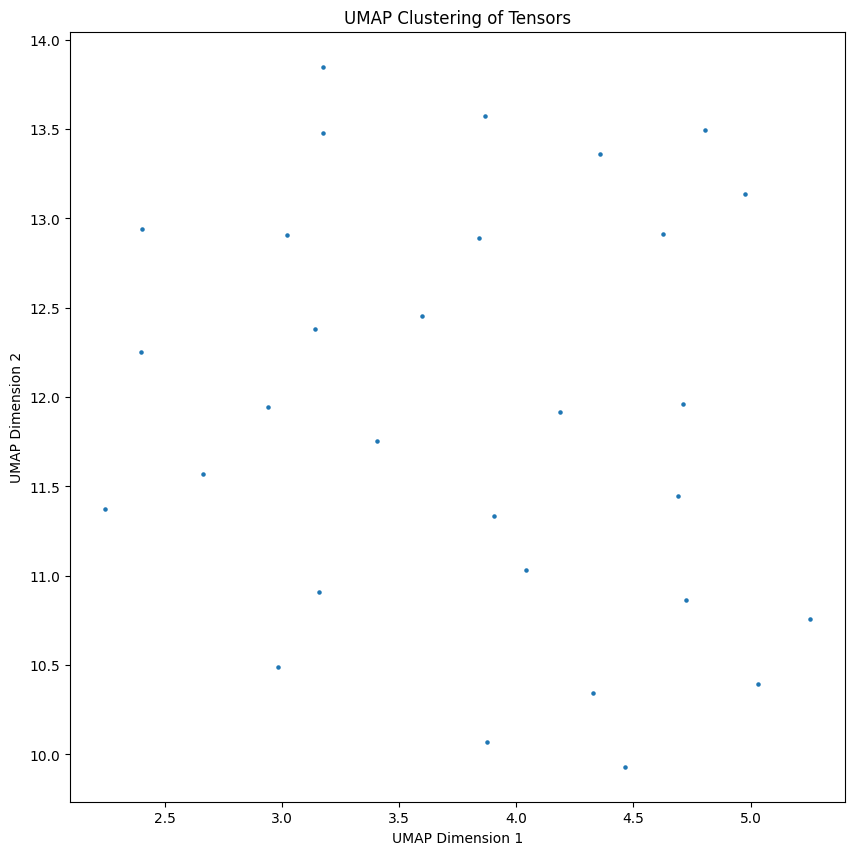

In [ ]:
import torch
import umap
import matplotlib.pyplot as plt
from typing import List

def flatten_and_concatenate_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flatten each tensor in the list to 1D, and then concatenate them into a 2D tensor.

    Args:
        tensors (List[torch.Tensor]): A list of tensors of any shape.

    Returns:
        torch.Tensor: A 2D tensor with each row representing a flattened tensor.
    """
    flattened_tensors = [t.view(t.size(0), -1) for t in tensors]
    concatenated_data = torch.cat(flattened_tensors, dim=0)
    return concatenated_data

def visualize_tensor_clustering(tensors: List[torch.Tensor], n_neighbors: int = 15, min_dist: float = 0.1) -> None:
    """
    Visualize the clustering of tensors using UMAP.

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_neighbors (int): The number of neighbors to consider for each point in UMAP. Default is 15.
        min_dist (float): The minimum distance between points in the UMAP embedding space. Default is 0.1.

    Returns:
        None
    """
    # Flatten and concatenate the tensors into a single tensor
    data = flatten_and_concatenate_tensors(tensors)

    # Perform UMAP dimensionality reduction
    umap_data = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist).fit_transform(data.numpy())

    # Plot the UMAP embedding
    plt.figure(figsize=(10, 10))
    plt.scatter(umap_data[:, 0], umap_data[:, 1], s=5)
    plt.title("UMAP Clustering of Tensors")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.show()

# Example usage
tensor1 = torch.randn( 10, 10)
tensor2 = torch.randn( 10, 10)
tensor3 = torch.randn( 10, 10)


tensor_list = [tensor1, tensor2, tensor3]
visualize_tensor_clustering(tensor_list)

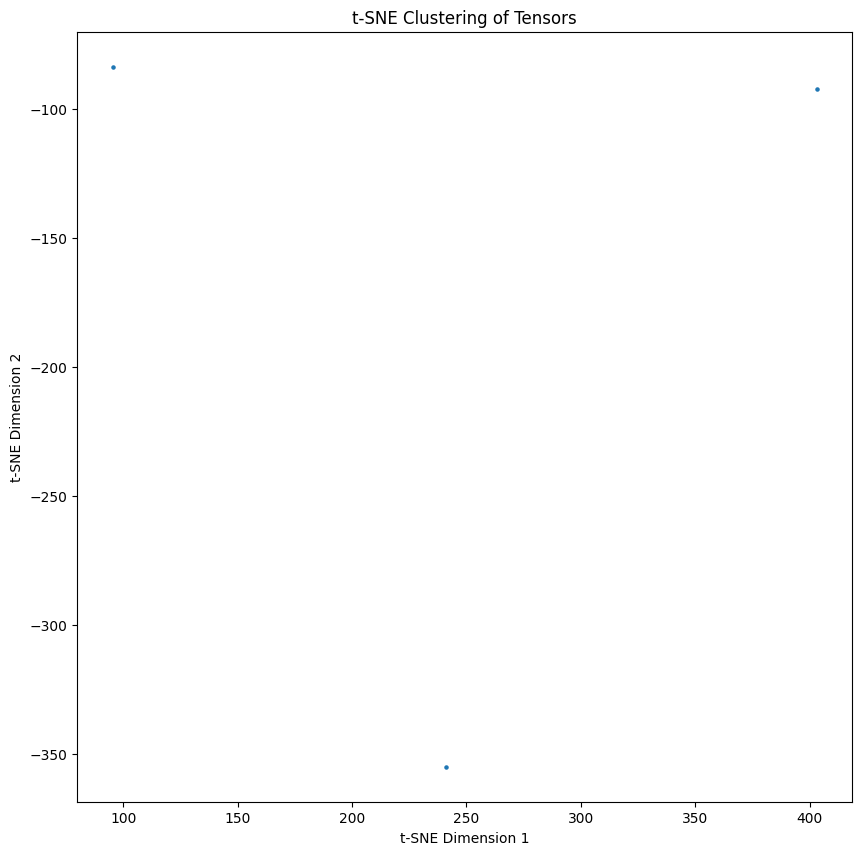

In [ ]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from typing import List


def flatten_and_concatenate_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flatten each tensor in the list to 1D, and then concatenate them into a 2D tensor.

    Args:
        tensors (List[torch.Tensor]): A list of tensors of any shape.

    Returns:
        torch.Tensor: A 2D tensor with each row representing a flattened tensor.
    """
    # Flatten each tensor to 2D where the first dimension is the batch size
    flattened_tensors = [t.view(-1) for t in tensors]  # Flatten each tensor to 1D
    concatenated_data = torch.stack(flattened_tensors)  # Stack the 1D tensors into a 2D tensor
    return concatenated_data

def visualize_tensor_clustering(tensors: List[torch.Tensor], perplexity: float = None, learning_rate: float = 200.0, n_iter: int = 1000) -> None:
    """
    Visualize the clustering of tensors using t-SNE.

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        perplexity (float): The perplexity parameter for t-SNE. If None, it will be set to min(30, n_samples - 1).
        learning_rate (float): The learning rate for t-SNE optimization. Default is 200.0.
        n_iter (int): The number of iterations for t-SNE optimization. Default is 1000.

    Returns:
        None
    """
    # Flatten and concatenate the tensors into a single tensor
    data = flatten_and_concatenate_tensors(tensors)

    # Set the perplexity to a default value if it's not provided
    if perplexity is None:
        perplexity = min(30, data.size(0) - 1)

    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter)
    tsne_data = tsne.fit_transform(data.numpy())

    # Plot the t-SNE embedding
    plt.figure(figsize=(10, 10))
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=5)
    plt.title("t-SNE Clustering of Tensors")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()

# Example usage with the corrected function
tensor1 = torch.randn(10, )
tensor2 = torch.randn(10, )
tensor3 = torch.randn(10, )

tensor_list = [tensor1, tensor2, tensor3]
visualize_tensor_clustering(tensor_list)



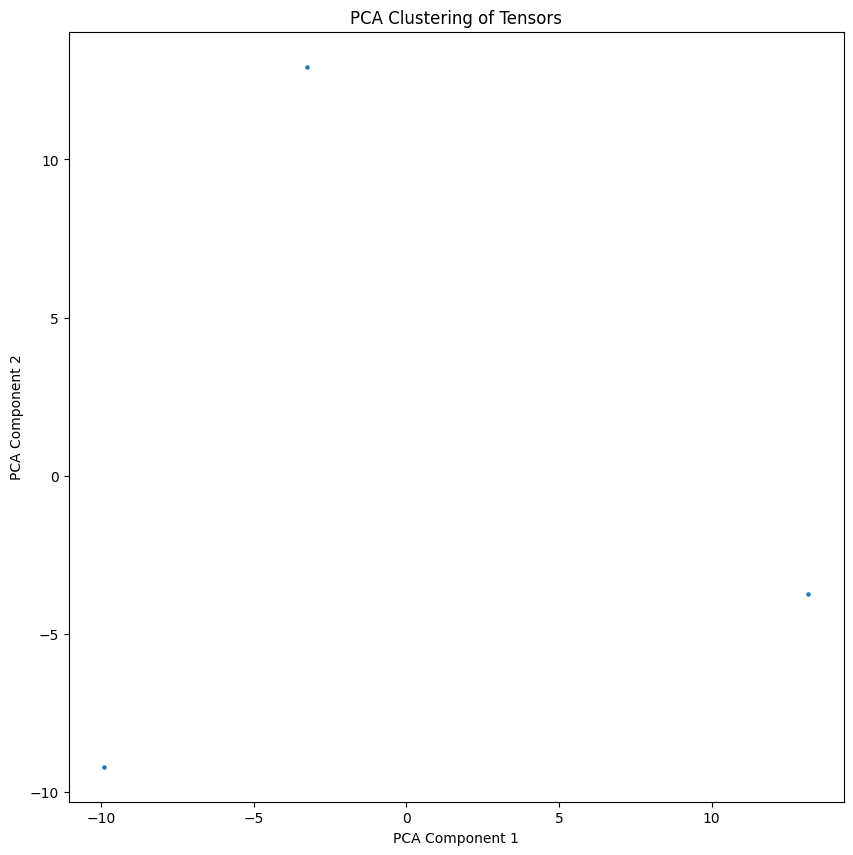

In [ ]:
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from typing import List


def flatten_and_concatenate_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flatten each tensor in the list to 1D, and then stack them into a 2D tensor.

    Args:
        tensors (List[torch.Tensor]): A list of tensors of any shape.

    Returns:
        torch.Tensor: A 2D tensor with each row representing a flattened tensor.
    """
    flattened_tensors = [t.flatten() for t in tensors]
    concatenated_data = torch.stack(flattened_tensors)
    return concatenated_data


def visualize_tensor_pca(tensors: List[torch.Tensor], n_components: int = 2) -> None:
    """
    Visualize the clustering of tensors using PCA.

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of principal components for PCA to compute. Default is 2.

    Returns:
        None
    """
    # Flatten and concatenate the tensors into a single tensor
    data = flatten_and_concatenate_tensors(tensors)

    # Perform PCA dimensionality reduction
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(data.numpy())

    # Plot the PCA embedding
    plt.figure(figsize=(10, 10))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], s=5)
    plt.title("PCA Clustering of Tensors")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


# Example usage with the modified function for PCA visualization
tensor1 = torch.randn(10, 5,5)
tensor2 = torch.randn(10, 5,5)
tensor3 = torch.randn(10, 5,5)

tensor_list = [tensor1, tensor2, tensor3]
visualize_tensor_pca(tensor_list)

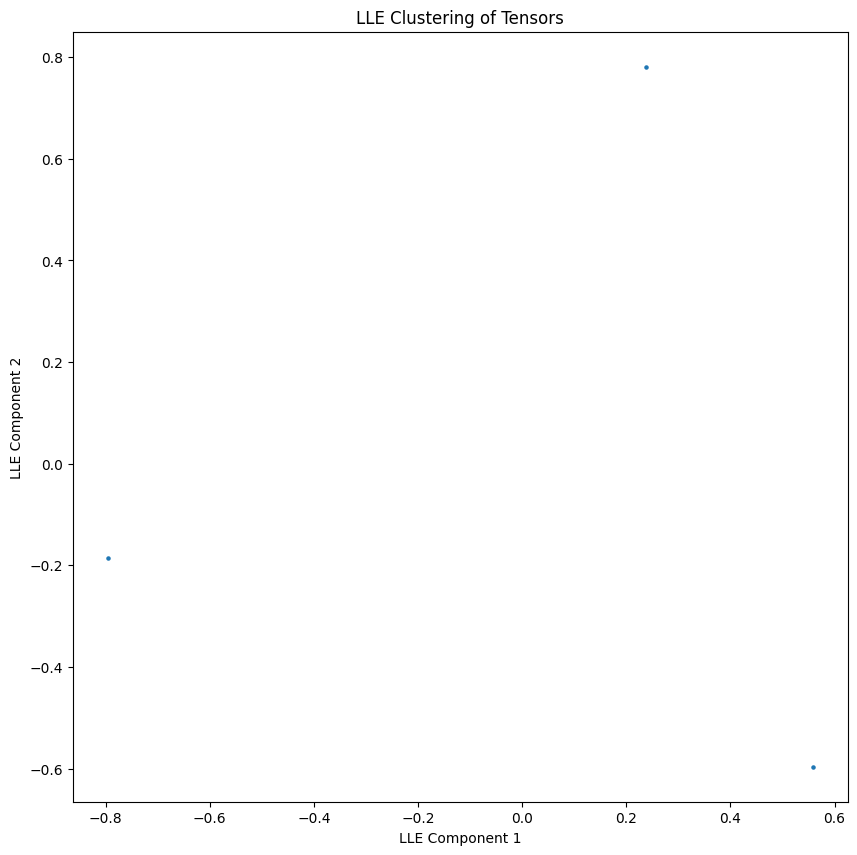

In [ ]:
import torch
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from typing import List


def flatten_and_concatenate_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flatten each tensor in the list to 1D, and then stack them into a 2D tensor.

    Args:
        tensors (List[torch.Tensor]): A list of tensors of any shape.

    Returns:
        torch.Tensor: A 2D tensor with each row representing a flattened tensor.
    """
    flattened_tensors = [t.flatten() for t in tensors]
    concatenated_data = torch.stack(flattened_tensors)
    return concatenated_data


def visualize_tensor_lle(tensors: List[torch.Tensor], n_components: int = 2, n_neighbors: int = None) -> None:
    """
    Visualize the clustering of tensors using Locally Linear Embedding (LLE).

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of dimensions for LLE to reduce the data to. Default is 2.
        n_neighbors (int): The number of neighbors to consider for each point in LLE.
                            If None, it will be set to min(number of samples - 1, 5). Default is None.

    Returns:
        None
    """
    # Flatten and concatenate the tensors into a single tensor
    data = flatten_and_concatenate_tensors(tensors)

    # Set the number of neighbors to the minimum of the number of samples minus one, or 5
    if n_neighbors is None:
        n_neighbors = min(data.size(0) - 1, 5)

    # Perform LLE dimensionality reduction
    lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors)
    lle_data = lle.fit_transform(data.numpy())

    # Plot the LLE embedding
    plt.figure(figsize=(10, 10))
    plt.scatter(lle_data[:, 0], lle_data[:, 1], s=5)
    plt.title("LLE Clustering of Tensors")
    plt.xlabel("LLE Component 1")
    plt.ylabel("LLE Component 2")
    plt.show()


# Example usage with the modified function for LLE visualization
tensor1 = torch.randn(10, 5)
tensor2 = torch.randn(10, 5)
tensor3 = torch.randn(10, 5)

tensor_list = [tensor1, tensor2, tensor3]
visualize_tensor_lle(tensor_list)

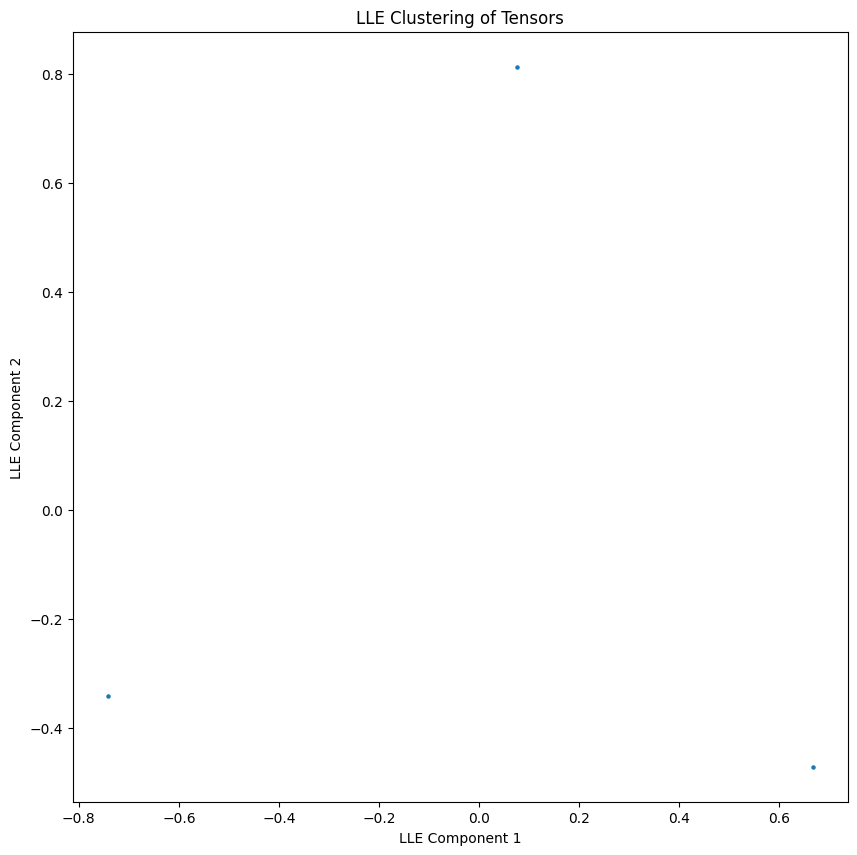

In [ ]:
import torch
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from typing import List


def flatten_and_concatenate_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flatten each tensor in the list to 1D, and then stack them into a 2D tensor.

    Args:
        tensors (List[torch.Tensor]): A list of tensors of any shape.

    Returns:
        torch.Tensor: A 2D tensor with each row representing a flattened tensor.
    """
    flattened_tensors = [t.flatten() for t in tensors]
    concatenated_data = torch.stack(flattened_tensors)
    return concatenated_data


def visualize_tensor_lle(tensors: List[torch.Tensor], n_components: int = 2, n_neighbors: int = None) -> None:
    """
    Visualize the clustering of tensors using Locally Linear Embedding (LLE).

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of dimensions for LLE to reduce the data to. Default is 2.
        n_neighbors (int): The number of neighbors to consider for each point in LLE. If None, it will be set to min(5, n_samples - 1). Default is None.

    Returns:
        None
    """
    # Flatten and concatenate the tensors into a single tensor
    data = flatten_and_concatenate_tensors(tensors)

    # Set the number of neighbors based on the number of input tensors
    if n_neighbors is None:
        n_neighbors = min(5, len(tensors) - 1)

    # Perform LLE dimensionality reduction
    lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors)
    lle_data = lle.fit_transform(data.numpy())

    # Plot the LLE embedding
    plt.figure(figsize=(10, 10))
    plt.scatter(lle_data[:, 0], lle_data[:, 1], s=5)
    plt.title("LLE Clustering of Tensors")
    plt.xlabel("LLE Component 1")
    plt.ylabel("LLE Component 2")
    plt.show()


# Example usage with the modified function for LLE visualization
tensor1 = torch.randn(10, 5)
tensor2 = torch.randn(10, 5)
tensor3 = torch.randn(10, 5)

tensor_list = [tensor1, tensor2, tensor3]
visualize_tensor_lle(tensor_list)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


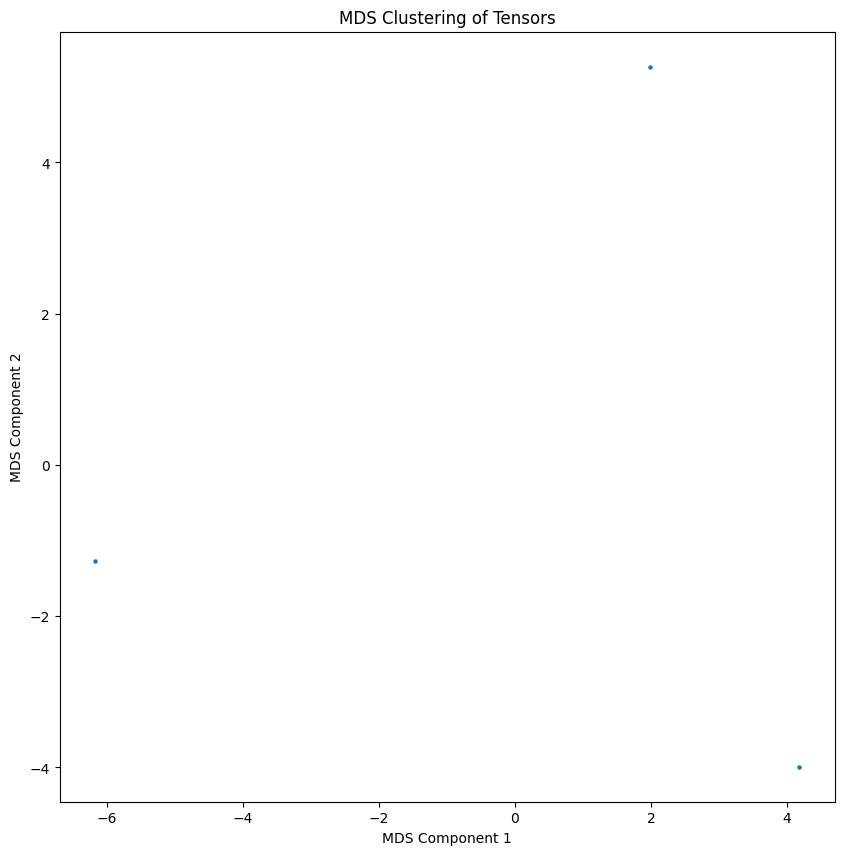

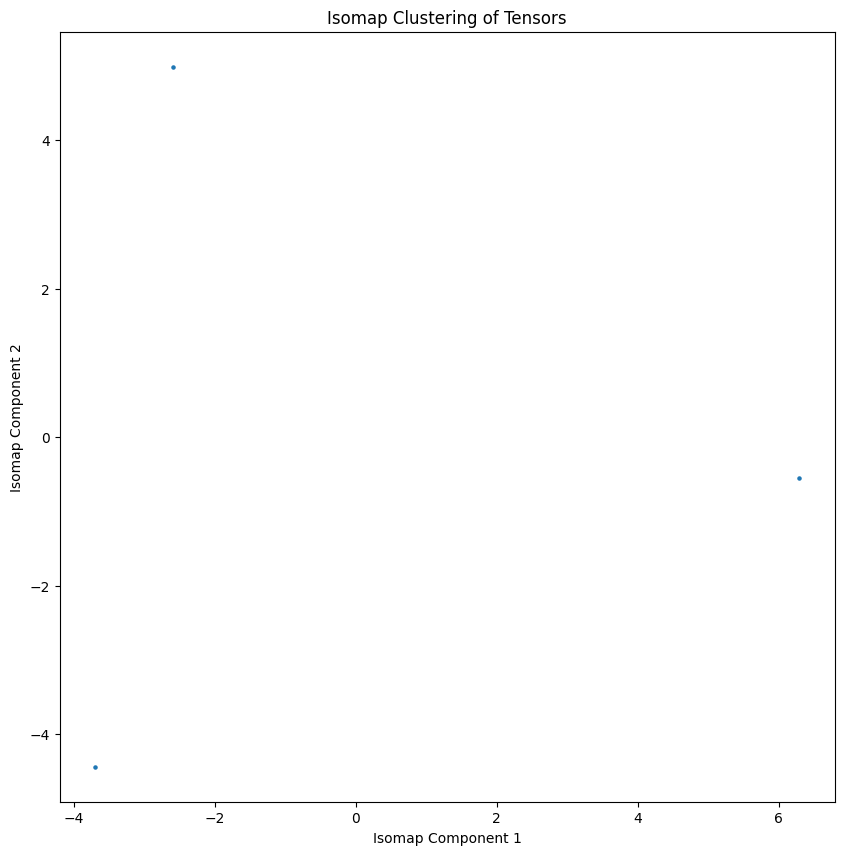

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import MDS, Isomap, SpectralEmbedding
from typing import List


def flatten_and_concatenate_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flatten each tensor in the list to 1D, and then stack them into a 2D tensor.

    Args:
        tensors (List[torch.Tensor]): A list of tensors of any shape.

    Returns:
        torch.Tensor: A 2D tensor with each row representing a flattened tensor.
    """
    flattened_tensors = [t.flatten() for t in tensors]
    concatenated_data = torch.stack(flattened_tensors)
    return concatenated_data


def visualize_tensor_mds(tensors: List[torch.Tensor], n_components: int = 2) -> None:
    """
    Visualize the clustering of tensors using Multi-Dimensional Scaling (MDS).

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of dimensions for MDS to reduce the data to. Default is 2.

    Returns:
        None
    """
    data = flatten_and_concatenate_tensors(tensors)
    mds = MDS(n_components=n_components)
    mds_data = mds.fit_transform(data.numpy())

    plt.figure(figsize=(10, 10))
    plt.scatter(mds_data[:, 0], mds_data[:, 1], s=5)
    plt.title("MDS Clustering of Tensors")
    plt.xlabel("MDS Component 1")
    plt.ylabel("MDS Component 2")
    plt.show()

# ...

def visualize_tensor_isomap(tensors: List[torch.Tensor], n_components: int = 2, n_neighbors: int = None) -> None:
    """
    Visualize the clustering of tensors using Isomap.

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of dimensions for Isomap to reduce the data to. Default is 2.
        n_neighbors (int): The number of neighbors to consider for each point in Isomap.
                           If None, it will be set to min(number of samples - 1, 5). Default is None.

    Returns:
        None
    """
    data = flatten_and_concatenate_tensors(tensors)
    if n_neighbors is None:
        n_neighbors = min(data.size(0) - 1, 5)  # Ensure n_neighbors is less than the number of samples

    isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
    isomap_data = isomap.fit_transform(data.numpy())

    plt.figure(figsize=(10, 10))
    plt.scatter(isomap_data[:, 0], isomap_data[:, 1], s=5)
    plt.title("Isomap Clustering of Tensors")
    plt.xlabel("Isomap Component 1")
    plt.ylabel("Isomap Component 2")
    plt.show()

def visualize_tensor_laplacian_eigenmaps(tensors: List[torch.Tensor], n_components: int = None, n_neighbors: int = None) -> None:
    """
    Visualize the clustering of tensors using Laplacian Eigenmaps.

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of dimensions for Laplacian Eigenmaps to reduce the data to.
                            If None, it will be set to min(n_samples - 1, 2). Default is None.
        n_neighbors (int): The number of neighbors to consider for each point in Laplacian Eigenmaps.
                           If None, it will be set to min(n_samples - 1, 5). Default is None.

    Returns:
        None
    """
    data = flatten_and_concatenate_tensors(tensors)
    n_samples = data.size(0)

    # Ensure the number of neighbors is less than the number of samples
    if n_neighbors is None:
        n_neighbors = min(n_samples - 1, 5)

    # Ensure n_components is less than n_samples
    if n_components is None:
        n_components = min(n_samples - 1, 2)
    elif n_components >= n_samples:
        raise ValueError(f"The number of components (n_components={n_components}) must be less than the number of samples (n_samples={n_samples}).")

    laplacian_eigenmaps = SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)
    laplacian_eigenmaps_data = laplacian_eigenmaps.fit_transform(data.numpy())

    plt.figure(figsize=(10, 10))
    plt.scatter(laplacian_eigenmaps_data[:, 0], laplacian_eigenmaps_data[:, 1], s=5)
    plt.title("Laplacian Eigenmaps Clustering of Tensors")
    plt.xlabel("Laplacian Eigenmap Component 1")
    plt.ylabel("Laplacian Eigenmap Component 2")
    plt.show()



# Example usage
tensor1 = torch.randn(5, 4, 3)
tensor2 = torch.randn(5, 4, 3)
tensor3 = torch.randn(5, 4, 3)

tensor_list = [tensor1, tensor2, tensor3]

# Visualize using MDS (does not require n_neighbors parameter)
visualize_tensor_mds(tensor_list)

# Visualize using Isomap
visualize_tensor_isomap(tensor_list)

# Visualize using Laplacian Eigenmaps
visualize_tensor_laplacian_eigenmaps(tensor_list)

In [ ]:
import torch
from sklearn.manifold import MDS, Isomap, SpectralEmbedding
import matplotlib.pyplot as plt
from typing import List


def flatten_and_concatenate_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flatten each tensor in the list to 1D, and then stack them into a 2D tensor.

    Args:
        tensors (List[torch.Tensor]): A list of tensors of any shape.

    Returns:
        torch.Tensor: A 2D tensor with each row representing a flattened tensor.
    """
    flattened_tensors = [t.flatten() for t in tensors]
    concatenated_data = torch.stack(flattened_tensors)
    return concatenated_data


def visualize_tensor_mds(tensors: List[torch.Tensor], n_components: int = 2) -> None:
    """
    Visualize the clustering of tensors using Multi-Dimensional Scaling (MDS).

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of dimensions for MDS to reduce the data to. Default is 2.

    Returns:
        None
    """
    data = flatten_and_concatenate_tensors(tensors)
    mds = MDS(n_components=n_components)
    mds_data = mds.fit_transform(data.numpy())

    plt.figure(figsize=(10, 10))
    plt.scatter(mds_data[:, 0], mds_data[:, 1], s=5)
    plt.title("MDS Clustering of Tensors")
    plt.xlabel("MDS Component 1")
    plt.ylabel("MDS Component 2")
    plt.show()


def visualize_tensor_isomap(tensors: List[torch.Tensor], n_components: int = 2, n_neighbors: int = None) -> None:
    """
    Visualize the clustering of tensors using Isomap (Isometric Mapping).

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of dimensions for Isomap to reduce the data to. Default is 2.
        n_neighbors (int): The number of neighbors to consider for each point in Isomap. If None, it will be set to min(5, n_samples - 1). Default is None.

    Returns:
        None
    """
    data = flatten_and_concatenate_tensors(tensors)

    if n_neighbors is None:
        n_neighbors = min(5, len(tensors) - 1)

    isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
    isomap_data = isomap.fit_transform(data.numpy())

    plt.figure(figsize=(10, 10))
    plt.scatter(isomap_data[:, 0], isomap_data[:, 1], s=5)
    plt.title("Isomap Clustering of Tensors")
    plt.xlabel("Isomap Component 1")
    plt.ylabel("Isomap Component 2")
    plt.show()


def visualize_tensor_laplacian_eigenmaps(tensors: List[torch.Tensor], n_components: int = 2, n_neighbors: int = None) -> None:
    """
    Visualize the clustering of tensors using Laplacian Eigenmaps.

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of dimensions for Laplacian Eigenmaps to reduce the data to. Default is 2.
        n_neighbors (int): The number of neighbors to consider for each point in Laplacian Eigenmaps. If None, it will be set to min(5, n_samples - 1). Default is None.

    Returns:
        None
    """
    data = flatten_and_concatenate_tensors(tensors)

    if n_neighbors is None:
        n_neighbors = min(5, len(tensors) - 1)

    laplacian_eigenmaps = SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)
    laplacian_data = laplacian_eigenmaps.fit_transform(data.numpy())

    plt.figure(figsize=(10, 10))
    plt.scatter(laplacian_data[:, 0], laplacian_data[:, 1], s=5)
    plt.title("Laplacian Eigenmaps Clustering of Tensors")
    plt.xlabel("Laplacian Eigenmaps Component 1")
    plt.ylabel("Laplacian Eigenmaps Component 2")
    plt.show()


# Test case with a list of tensors of different dimensions
tensor1 = torch.randn(10, 5, 3)
tensor2 = torch.randn(8, 4)
tensor3 = torch.randn(12, 7, 2)

tensor_list = [tensor1, tensor2, tensor3]

visualize_tensor_mds(tensor_list)
visualize_tensor_isomap(tensor_list)
visualize_tensor_laplacian_eigenmaps(tensor_list)

RuntimeError: stack expects each tensor to be equal size, but got [150] at entry 0 and [32] at entry 1

In [ ]:
import torch
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from typing import List


def flatten_and_concatenate_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flatten each tensor in the list to 1D, and then concatenate them into a 2D tensor.

    Args:
        tensors (List[torch.Tensor]): A list of tensors of any shape.

    Returns:
        torch.Tensor: A 2D tensor with each row representing a flattened tensor.
    """
    flattened_tensors = [t.view(-1) for t in tensors]
    concatenated_data = torch.stack(flattened_tensors)
    return concatenated_data


def visualize_tensor_clustering_lle(tensors: List[torch.Tensor], n_components: int = 2, n_neighbors: int = 5) -> None:
    """
    Visualize the clustering of tensors using LLE.

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of dimensions in the embedding space. Default is 2.
        n_neighbors (int): The number of neighbors to consider for each point. Default is 5.

    Returns:
        None
    """
    # Flatten and concatenate the tensors into a single tensor
    data = flatten_and_concatenate_tensors(tensors)

    # Perform LLE dimensionality reduction
    lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=n_neighbors)
    lle_data = lle.fit_transform(data.numpy())

    # Plot the LLE embedding
    plt.figure(figsize=(10, 10))
    plt.scatter(lle_data[:, 0], lle_data[:, 1], s=5)
    plt.title("LLE Clustering of Tensors")
    plt.xlabel("LLE Dimension 1")
    plt.ylabel("LLE Dimension 2")
    plt.show()


# Example usage
tensor1 = torch.randn(10, 5)
tensor2 = torch.randn(8, 3)
tensor3 = torch.randn(12, 7)

tensor_list = [tensor1, tensor2, tensor3]
visualize_tensor_clustering_lle(tensor_list)

RuntimeError: stack expects each tensor to be equal size, but got [50] at entry 0 and [24] at entry 1

In [ ]:
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from typing import List


def flatten_and_concatenate_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flatten each tensor in the list to 1D, and then concatenate them into a 2D tensor.

    Args:
        tensors (List[torch.Tensor]): A list of tensors of any shape.

    Returns:
        torch.Tensor: A 2D tensor with each row representing a flattened tensor.
    """
    flattened_tensors = [t.view(-1) for t in tensors]
    concatenated_data = torch.stack(flattened_tensors)
    return concatenated_data


def visualize_tensor_clustering_pca(tensors: List[torch.Tensor], n_components: int = 2) -> None:
    """
    Visualize the clustering of tensors using PCA.

    Args:
        tensors (List[torch.Tensor]): A list of tensors to be clustered.
        n_components (int): The number of principal components to use for visualization. Default is 2.

    Returns:
        None
    """
    # Flatten and concatenate the tensors into a single tensor
    data = flatten_and_concatenate_tensors(tensors)

    # Perform PCA dimensionality reduction
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(data.numpy())

    # Plot the PCA embedding
    plt.figure(figsize=(10, 10))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], s=5)
    plt.title("PCA Clustering of Tensors")
    plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})")
    plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})")
    plt.show()


# Example usage
tensor1 = torch.randn(10, 5)
tensor2 = torch.randn(8, 3)
tensor3 = torch.randn(12, 7)

tensor_list = [tensor1, tensor2, tensor3]
visualize_tensor_clustering_pca(tensor_list)

RuntimeError: stack expects each tensor to be equal size, but got [50] at entry 0 and [24] at entry 1

In [ ]:
import torch
from typing import List
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def flatten_tensors(tensors: List[torch.Tensor]) -> torch.Tensor:
    """
    Flattens a list of tensors into a 2D tensor where each row is a flattened tensor.

    :param tensors: List of PyTorch tensors of any dimension.
    :return: A 2D tensor of shape (num_tensors, num_features), where num_features is the number of elements in each original tensor.
    """
    return torch.stack([t.view(-1) for t in tensors])

def perform_umap(tensor_data: torch.Tensor, n_components: int = 2) -> List:
    """
    Performs UMAP dimensionality reduction on the given tensor data.

    :param tensor_data: A 2D tensor with shape (num_samples, num_features).
    :param n_components: The number of dimensions to reduce to, typically 2 for visualization purposes.
    :return: The UMAP embeddings as a list.
    """
    umap_model = UMAP(n_components=n_components)
    embeddings = umap_model.fit_transform(tensor_data)
    return embeddings

def cluster_and_visualize(embeddings: List, n_clusters: int):
    """
    Performs KMeans clustering on the UMAP embeddings and visualizes the clusters.

    :param embeddings: The UMAP embeddings as a list.
    :param n_clusters: The number of clusters to form.
    """
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(embeddings)
    cluster_labels = kmeans.labels_

    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_labels, cmap='Spectral', s=5)
    plt.colorbar()
    plt.title('Clusters of Tensors using UMAP Embeddings')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.show()

# Example usage:

# Suppose we have a list of tensors, which could be of any dimension.
# For the sake of the example, we will create random tensors with different shapes.
tensor_list = [torch.randn(2, 3), torch.randn(4, 5), torch.randn(10), torch.randn(3, 2, 2)]

# Step 1: Flatten the list of tensors.
flattened_tensors = flatten_tensors(tensor_list)

# Step 2: Perform UMAP dimensionality reduction to obtain 2D embeddings.
embeddings = perform_umap(flattened_tensors.numpy())

# Step 3: Perform clustering and visualize the results.
cluster_and_visualize(embeddings, n_clusters=3)

RuntimeError: stack expects each tensor to be equal size, but got [6] at entry 0 and [20] at entry 1